# Favrskov

Comments:
- There are duplicates. I have decided to keep the last of the duplicates, assuming its the right information
- There is info on the rooms in S.03 only for one day, so I have dropped them.
- I have dropped all rows for which I did not have information for all the rooms. This leaves me with 1320 rows, which are 55 days. The rest of 2022 has been discarded.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from thermo.utils.time import is_schoolday
v_schoolday = np.vectorize(is_schoolday)

## Bookings

In [2]:
bookings = pd.read_csv("../assets/Booking.csv").loc[lambda x: x["MUNICIPALITY"].eq("Favrskov")].drop_duplicates(subset="MUNICIPALITY_DATE_TIME_ROOM", keep='last')

In [3]:
bookings

,ROOM_ID,DATO,TIME,BOOKED,MUNICIPALITY_DATE_TIME_ROOM,MUNICIPALITY,SCHOOL
0,C.27,2022-08-09,18:00:00,1,09-08-2022-18:00:00-C.27-Favrskov,Favrskov,Rønbækskolen
1,D.17,2022-08-09,18:00:00,1,09-08-2022-18:00:00-D.17-Favrskov,Favrskov,Rønbækskolen
2,H.02,2022-08-09,18:00:00,1,09-08-2022-18:00:00-H.02-Favrskov,Favrskov,Rønbækskolen
3,H.01,2022-08-09,18:00:00,1,09-08-2022-18:00:00-H.01-Favrskov,Favrskov,Rønbækskolen
4,G.06,2022-08-09,18:00:00,1,09-08-2022-18:00:00-G.06-Favrskov,Favrskov,Rønbækskolen
...,...,...,...,...,...,...,...
178074,C.26,2023-04-15,22:00:00,1,15-04-2023-22:00:00-C.26-Favrskov,Favrskov,Rønbækskolen
178075,J.03,2023-04-15,22:00:00,1,15-04-2023-22:00:00-J.03-Favrskov,Favrskov,Rønbækskolen
178076,A.13,2023-04-15,22:00:00,1,15-04-2023-22:00:00-A.13-Favrskov,Favrskov,Rønbækskolen
178077,D.17,2023-04-15,22:00:00,1,15-04-2023-22:00:00-D.17-Favrskov,Favrskov,Rønbækskolen


In [4]:
bookings["ROOM_ID"].value_counts()

ROOM_ID
H.01    7224
A.13    7224
H.06    5496
C.15    4176
H.05    3984
        ... 
B.42     168
C.12     144
J.03      72
E.35      24
B.57      24
Name: count, Length: 64, dtype: int64

## Electricity

In [5]:
energy = pd.read_csv("../assets/Energy.csv").dropna().loc[lambda x: x["MUNICIPALITY"].eq("Favrskov")].loc[lambda x: x["MEASURE_TYPE"].eq("Electricity")].loc[lambda x: x["DATO"].str.startswith("2022")]

In [6]:
energy

,MEASURE_POINT,DATO,MEASURE_TYPE,VALUE,UNIT,TIME,MUNICIPALITY_DATE,MUNICIPALITY,SCHOOL
203764,74,2022-01-01,Electricity,7.16,kWh,00:00:00,2022-01-01-Favrskov,Favrskov,Rønbækskolen
203765,74,2022-01-01,Electricity,7.08,kWh,01:00:00,2022-01-01-Favrskov,Favrskov,Rønbækskolen
203766,74,2022-01-01,Electricity,7.21,kWh,02:00:00,2022-01-01-Favrskov,Favrskov,Rønbækskolen
203767,74,2022-01-01,Electricity,7.03,kWh,03:00:00,2022-01-01-Favrskov,Favrskov,Rønbækskolen
203768,74,2022-01-01,Electricity,7.15,kWh,04:00:00,2022-01-01-Favrskov,Favrskov,Rønbækskolen
...,...,...,...,...,...,...,...,...,...
222753,3365,2022-12-31,Electricity,6.03,kWh,19:00:00,2022-12-31-Favrskov,Favrskov,Rønbækskolen
222754,3365,2022-12-31,Electricity,6.02,kWh,20:00:00,2022-12-31-Favrskov,Favrskov,Rønbækskolen
222755,3365,2022-12-31,Electricity,5.96,kWh,21:00:00,2022-12-31-Favrskov,Favrskov,Rønbækskolen
222756,3365,2022-12-31,Electricity,5.75,kWh,22:00:00,2022-12-31-Favrskov,Favrskov,Rønbækskolen


In [7]:
energy["MEASURE_POINT"].value_counts()

MEASURE_POINT
74      8759
3365    8759
Name: count, dtype: int64

In [8]:
pivoted = (energy
 .assign(datetime=pd.to_datetime(energy["DATO"] + " " + energy["TIME"]))
 .pivot(index="datetime", values="VALUE", columns="MEASURE_POINT")
)
pivoted = pivoted.rename(columns={column: str(column) for column in pivoted.columns})
sum(pivoted["74"]!=pivoted["3365"])

0

In [9]:
electricity = energy.set_index(pd.to_datetime(energy["DATO"] + " " + energy["TIME"]))[["VALUE"]]

In [10]:
electricity

,VALUE
2022-01-01 00:00:00,7.16
2022-01-01 01:00:00,7.08
2022-01-01 02:00:00,7.21
2022-01-01 03:00:00,7.03
2022-01-01 04:00:00,7.15
...,...
2022-12-31 19:00:00,6.03
2022-12-31 20:00:00,6.02
2022-12-31 21:00:00,5.96
2022-12-31 22:00:00,5.75


/home/esgarijo/.pyenv/versions/3.10.4/envs/thermo/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/esgarijo/.pyenv/versions/3.10.4/envs/thermo/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/esgarijo/.pyenv/versions/3.10.4/envs/thermo/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/esgarijo/.pyenv/versions/3.10.4/envs/thermo/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_c

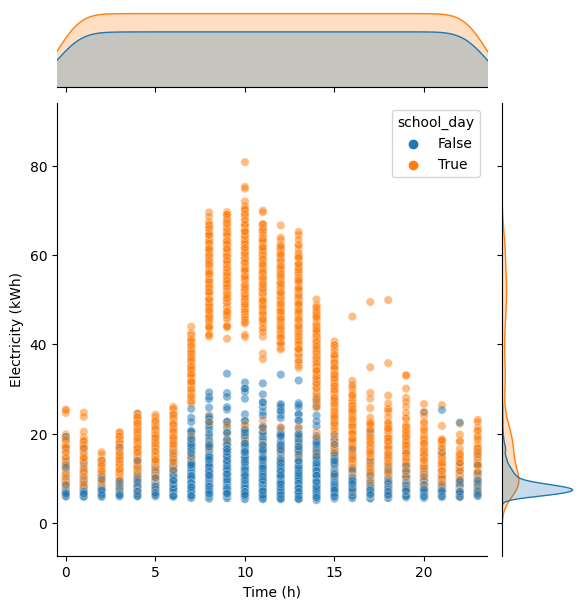

In [11]:
sns.jointplot(electricity.assign(school_day = lambda d: v_schoolday(d.index.date)), x=electricity.index.hour, y="VALUE", hue="school_day", alpha=0.3, xlim=(-0.5,23.5))
plt.xlabel("Time (h)")
plt.ylabel("Electricity (kWh)")
plt.show()

/home/esgarijo/.pyenv/versions/3.10.4/envs/thermo/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/esgarijo/.pyenv/versions/3.10.4/envs/thermo/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/esgarijo/.pyenv/versions/3.10.4/envs/thermo/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


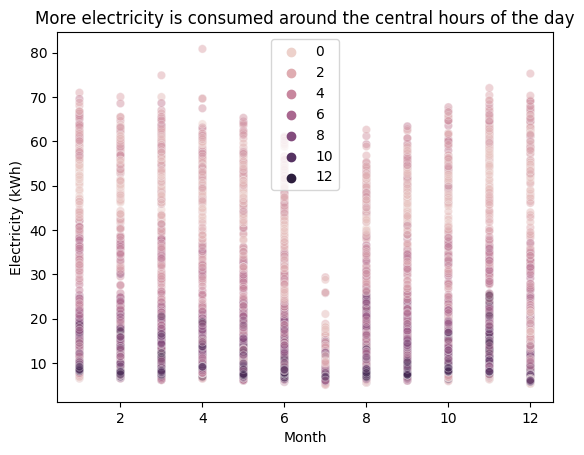

In [12]:
#sns.jointplot(electricity.assign(school_day = lambda d: v_schoolday(d.index.date)), x=electricity.index.month, y="VALUE", hue="school_day", alpha=0.3, xlim=(-0.5,12.5))
sns.scatterplot(electricity.assign(school_day = lambda d: v_schoolday(d.index.date)), x=electricity.index.month, y="VALUE", hue=np.abs(electricity.index.hour-12), alpha=0.3)
plt.xlabel("Month")
plt.ylabel("Electricity (kWh)")
plt.title("More electricity is consumed around the central hours of the day")
plt.show()

/home/esgarijo/.pyenv/versions/3.10.4/envs/thermo/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/esgarijo/.pyenv/versions/3.10.4/envs/thermo/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/esgarijo/.pyenv/versions/3.10.4/envs/thermo/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/esgarijo/.pyenv/versions/3.10.4/envs/thermo/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_c

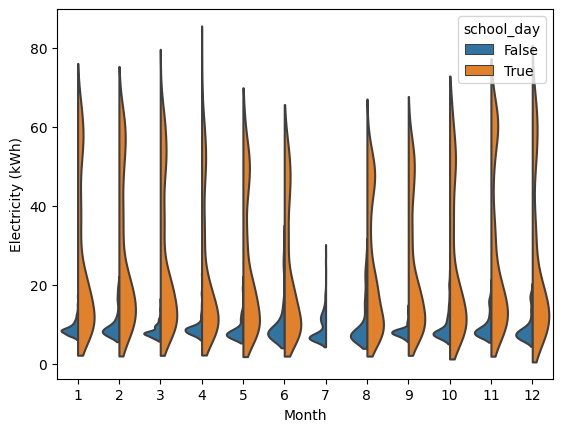

In [13]:
#sns.jointplot(electricity.assign(school_day = lambda d: v_schoolday(d.index.date)), x=electricity.index.month, y="VALUE", hue="school_day", alpha=0.3, xlim=(-0.5,12.5))
sns.violinplot(electricity.assign(school_day = lambda d: v_schoolday(d.index.date)), x=electricity.index.month, y="VALUE", hue="school_day", split=True, cut=1, bw="silverman", scale="width", inner=None)
plt.xlabel("Month")
plt.ylabel("Electricity (kWh)")
plt.show()

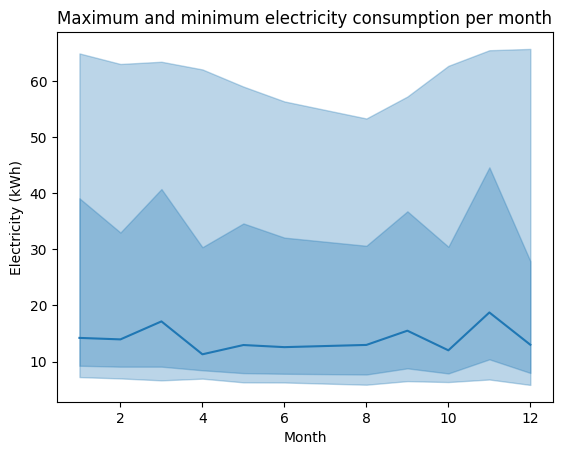

In [14]:
plot_data = sum(electricity.loc[lambda x: x.index.hour>= 8].loc[lambda x: x.index.month !=7].sample(300).assign(month=lambda x: x.index.month).groupby("month")["VALUE"].describe() for i in range(60)).div(60)
plt.plot(plot_data.index, plot_data["50%"])
plt.fill_between(plot_data.index, plot_data["min"], plot_data["max"], color="tab:blue", alpha=0.3, interpolate=True)
plt.fill_between(plot_data.index, plot_data["25%"], plot_data["75%"], color="tab:blue", alpha=0.3, interpolate=True)
plt.title("Maximum and minimum electricity consumption per month")
plt.xlabel("Month")
plt.ylabel("Electricity (kWh)")
plt.show()

## CO2

In [15]:
iot = pd.read_csv("../assets/Indoor_Climate.csv").loc[lambda x: x["MUNICIPALITY"].eq("Aarhus")] # We don't have data

In [16]:
iot

,ROOM_ID,DATE,TIME,TEMPERATURE,CO2,MUNICIPALITY_DATE_TIME_ROOM,MUNICIPALITY,SCHOOL
